# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - 2 / n * \sum_{i = objnum}^{objnum + n} (a_i - y_i) ^ 2 - 1 / C * \sum_{j = 1} ^ {k} w_{oldj} ^ 2 $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$grad=\frac{d}{dw}(1 / n * \sum_{i={batchnum}}^{batchnum+n} (a_i - y_i) ^ 2 - 1/C * \sum_{j=1}^{m} w_j^2)$$ $$grad=2 / n * \sum_{i={batchnum}}^{batchnum+n} (a_i - y_i) * x_i - 2 / C * w$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$w_{new}=w_{old} - 1 / N * \sum_{i={objnum}}^{objnum+n} (\sigma_i - y_i) * x_i - 2 / C * {w_{old}}$$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$grad = \frac{d}{dw} (- \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w))$$
$$grad = - 1 / N * \sum_{i = objnum}^{objnum + n} (\sigma_i - y_i) * x_i - 2 / c * w $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

Это наш Гессиан, выглядит он вот так:
$$ H(Q(w)) =
 \begin{pmatrix}
  \frac{\partial^{2} f}{\partial w_{0}^{2}} & \frac{\partial^{2} f}{\partial w_{0} \partial w_{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{0} \partial w_{D}} \\
  \frac{\partial^{2} f}{\partial w_{1} \partial w_{0}} & \frac{\partial^{2} f}{\partial w_{0}^{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{1} \partial w_{D}} \\
  \vdots  & \vdots  &  \frac{\partial^{2} f}{\partial w_{i} \partial w_{j}} & \vdots  \\
  \frac{\partial^{2} f}{\partial w_{D} \partial w_{0}} & \frac{\partial^{2} f}{\partial w_{D} \partial w_{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{D}^{2}} 
 \end{pmatrix}$$
 
Для того чтобы доказать, что точное решение линейной регрессии $w = (X^TX)^{-1}X^TY $ является минимумом, достаточно положительной опрделёности Гессиана$$|H(Q(w)| > 0$$
 
Тогда взяв вторые производные (или взяв просто один раз производную от точного решения, см.лекция 3) приходим, что:
$$H(Q(w)) = 2 X^{T}X$$
Теперь докажем, что Гессиан положительно определён, для этого воспользуемся **Критерием Положительной Определённости Матрицы:** Матрица А положительно определена тогда и только тогда, когда существует такая невырожденная матрица В, что ${\color{red}A = \color{red}{B^{T}} \color{red}* \color{red}B}$
$$\implies \exists B = \sqrt{2} X: B^{T}B = H(Q(w))$$X невырождена(имеет строк не меньше, чем столбцов и полный ранг - по условию) $\implies H(Q(w))$ положительно определена.



$$ \text{Точное решение для модели с L2-регуляризацией: (из лекций)} \\
X^{T}X \overrightarrow{w} - X^{T} \overrightarrow{y} + \frac{1}{C}\overrightarrow{w} = 0 \rightarrow
\overrightarrow{w} = \left( X^{T}X + \frac{1}{C}I \right)^{-1} X^{T} \overrightarrow{y}
$$
Делает матрицу Х невырожденной, смещение собственных значених на коэффициент $\frac{1}{C}$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$ \frac{\partial{E}} {\partial{a}} (L | x_i) = \frac{\partial}{\partial{a}} \left[ -p(y_i = 1 |x_i) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i)) \right] = \\ $$
$$= \frac{-p(y_i = 1 |x_i)}{a(x_{i})} + \frac{p(y_i = 0 | x_i)}{1 - a(x_{i})} = $$
$$= \frac{p(y_i = 0 | x_i) a(x_{i}) - p(y_i = 1 |x_i)(1 - a(x_{i}))} {a(x_{i}) (1 - a(x_{i}))} = $$
Воспользуемся тем, что $\color{red}{p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1}$

$$= \frac{a(x_{i})(p(y_i = 0 | x_i) + p(y_i = 1 | x_i)) - p(y_{i} = 1 | x_{i}) }{a(x_{i}) (1 - a(x_{i}))} =$$$$= \frac{a(x_{i}) - p(y_{i} = 1 | x_{i})} {a(x_{i}) (1 - a(x_{i}))} \Rightarrow \text{ Равенство производной нулю достигается при } a = p(y_{i} = 1 | x_{i})
$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Да, он нужен. В случаях, когда все признаки равны нулю или близки, значение $w_o$ оказывается очень полезен. Он дает нам предсказание в таких вырожденных случаях. Так же он отвечает за смещение прямой(плоскости) относительно начала координат

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [122]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
from math import exp, log2, log
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
import sklearn

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle == True:
         X, y = sklearn.utils.shuffle(X, y, random_state=0)
    count_batches = X.shape[0] // batch_size
    for i in range(count_batches):
        indx = batch_size * i
        size = batch_size * (i + 1)
        X_batch = X[indx : size]
        y_batch = y[indx : size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [24]:
#%%pycodestyle
from sklearn.utils import shuffle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    return 1 / (1 + np.exp(-x))


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        """
        xw = np.dot(X_batch,  self.weights)
        a = np.array(xw)
        reg = (1 / self.C) * np.sum(self.weights[1:] ** 2)
        
        if self.model_type == 'lin_reg':
            loss = np.mean((y_batch - a) ** 2) + reg
        if self.model_type == 'log_reg':
            loss = -np.mean(y_batch * np.log(sigmoid(a))) +\
            (1 - y_batch) * np.log(1 - sigmoid(a)) + reg
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        """
        reg = 2 / self.C * (self.weights)
        
        if(self.model_type == 'lin_reg'):
            loss_grad = 2 * np.mean((X_batch.dot(self.weights) - y_batch)) + reg
        if(self.model_type == 'log_reg'):
            loss_grad = (sigmoid(np.dot(X_batch, self.weights)) - y_batch) / X_batch.shape[0] +\
            reg
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
        return self
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        #self.weights = np.array(np.random.rand(X.shape[1] + 1), dtype=np.float64)
        #print("start", self.weights)
        #X_fict = np.hstack((np.ones((X.shape[0], 1)), X))
        #for n in range(0, self.max_epoch):
            #print("epoch", self.weights)
            #new_epoch_generator = self.batch_generator(X_fict, y, batch_size=self.batch_size)
            #for batch_num, new_batch in enumerate(new_epoch_generator):
                #X_batch = new_batch[0]
                #y_batch = new_batch[1]
                #batch_grad = self.calc_loss_grad(X_batch, y_batch)
                #self.update_weights(batch_grad)
                #batch_loss = self.calc_loss(X_batch, y_batch)
                #self.errors_log['iter'].append(batch_num)
                #self.errors_log['loss'].append(batch_loss)
        
#         np.random.seed(37)
        N = X.shape[1]
        self.weights = np.random.rand(N + 1)
#         self.weights = np.array(np.random.rand(X.shape[1] + 1), dtype=np.float64)
        for n in range(0, self.max_epoch):
            new_epoch_generator = batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                f = np.ones(new_batch[0].shape[0])[:, np.newaxis]
                X_batch = np.hstack((f, new_batch[0]))
                y_batch = new_batch[1]
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        
        return self
        
    def predict(self, X, threshold = 0.5):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        print("weight", self.weights)
        X_fict = np.hstack((np.ones((X.shape[0], 1)), X))
        
        if self.model_type == 'lin_reg':
            a = np.dot(X_fict, self.weights)
            return np.where(a >= threshold, 1, 0)
        if self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_fict, self.weights))
            return np.where(a >= threshold, 1, 0)
        
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
#         return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [200]:
def plot_decision_boundary(clf):
    x = np.linspace(-5, 5)
    y = (0.5-clf.weights[1]*x - clf.weights[0])/clf.weights[2]
    plt.plot(x, y, 'g')
    line1, = plt.plot(x, y, '-b', label='mySGD')
    return line1

In [201]:
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier

[ 0.01593275  0.13375439 -0.09631208]
weight [ 0.01593275  0.13375439 -0.09631208]


0.8775

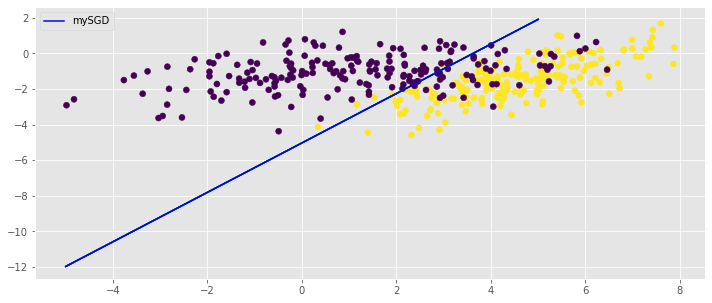

In [202]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.001, C=1, max_epoch = 15)
my_clf.fit(X, y)
plot_decision_boundary(my_clf)

line1 = plot_decision_boundary(my_clf)
print(my_clf.weights)

# plot_decision_boundary(your_model)
plt.legend(handles=[line1])
plt.scatter(X[:,0], X[:,1], c=y)
my_clf.score(X, y)

In [203]:
def plot_decision_boundary(clf):
    x = np.linspace(-5, 5)
    y = (-clf.weights[1]*x - clf.weights[0])/clf.weights[2]
    plt.plot(x, y, 'g')
    line1, = plt.plot(x, y, '-g', label='mySGD')
    return line1

In [204]:
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier

[-2.26594298  0.635652   -0.49612622]
weight [-2.26594298  0.635652   -0.49612622]
0.8675


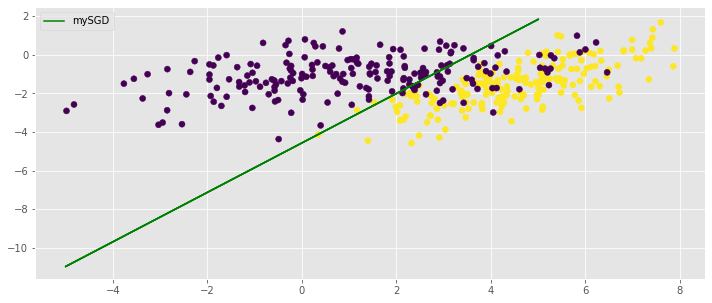

In [205]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator, model_type='log_reg', batch_size=10, alpha=0.01, C=100, max_epoch = 200)
my_clf.fit(X, y)
plot_decision_boundary(my_clf)

line1 = plot_decision_boundary(my_clf)
print(my_clf.weights)

# plot_decision_boundary(your_model)
plt.legend(handles=[line1])
plt.scatter(X[:,0], X[:,1], c=y)
print(my_clf.score(X, y))
#print(my_clf.predict(X))

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [206]:
from sklearn.datasets import make_classification

In [207]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

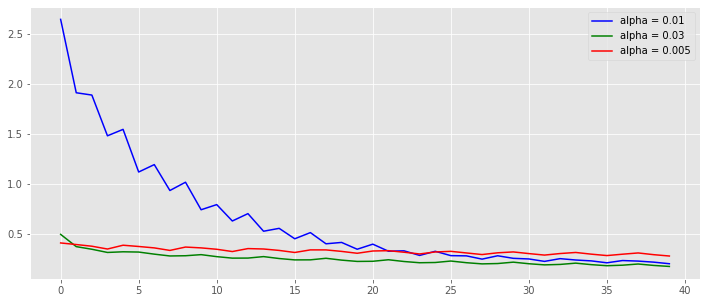

In [340]:
X_train = X
y_train = y
alpha = [0.01, 0.03, 0.005]
fig, pl = plt.subplots()
for j, i in enumerate(alpha):
    my_clf = MySGDClassifier(batch_generator = batch_generator,batch_size =100, C = 1, 
                         alpha = i,
                         max_epoch = 10, model_type = 'lin_reg')
    my_clf.fit(X_train, y_train)
    x = np.arange(len(my_clf.errors_log['loss']))
    color = ['b', 'g', 'r']
    pl.plot(x, my_clf.errors_log['loss'],color=color[j], label='alpha = {}'.format(alpha[j]))
pl.legend()

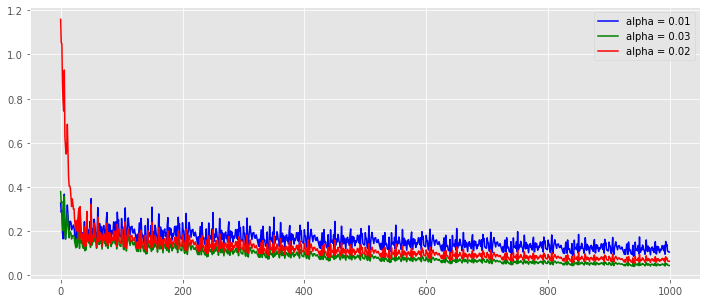

In [357]:
alpha = [0.01, 0.03, 0.02]
fig, pl = plt.subplots()
for j, i in enumerate(alpha):
    my_clf = MySGDClassifier(batch_generator = batch_generator,batch_size =1, C = 1, 
                         alpha = i,
                         max_epoch = 10, model_type = 'log_reg')
    my_clf.fit(X_train, y_train)
    x = np.arange(len(my_clf.errors_log['loss']))
    color = ['b', 'g', 'r']
    pl.plot(x, my_clf.errors_log['loss'],color=color[j], label='alpha = {}'.format(alpha[j]))
pl.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

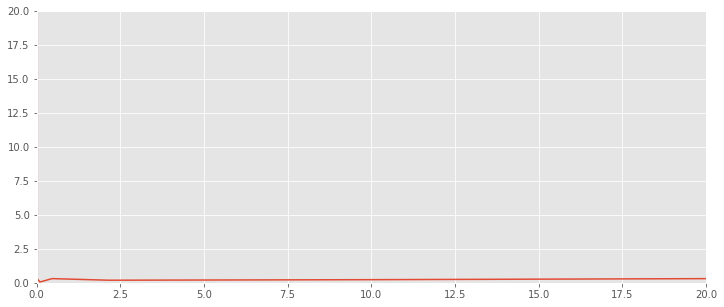

In [396]:
x = np.logspace(3, -3, 10)
p = []
for i in x:
    p.append(np.mean(MySGDClassifier(batch_generator,
                                     model_type='lin_reg',
                                     C=i, batch_size=300).fit(X, y).weights))
plt.plot(x, p)
plt.xlim(0, 20) 
plt.ylim(0, 20) 
plt.show()

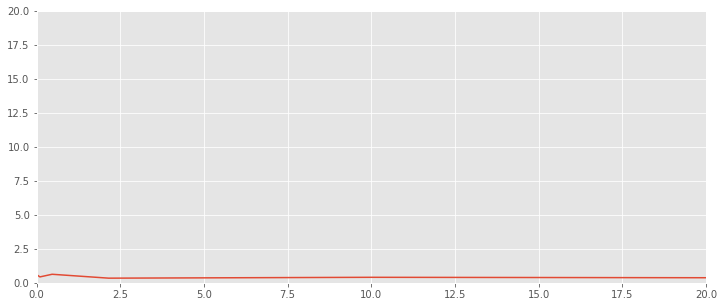

In [415]:
x = np.logspace(3, -3, 10)
p = []
for i in x:
    p.append(np.mean(MySGDClassifier(batch_generator,
                                     model_type='log_reg',
                                     C=i, batch_size=600).fit(X, y).weights))
plt.plot(x, p)
plt.xlim(0, 20) 
plt.ylim(0, 20) 
plt.show()

In [410]:
from sklearn.model_selection import cross_val_score
my_clf = MySGDClassifier(batch_generator, alpha=alpha, 
                          max_epoch=8, model_type = 'lin_reg', C=15, batch_size = 20)
my_clf.fit(X, y)
score = cross_val_score(my_clf, X, y, cv=8, scoring='accuracy')
print('score = ', score.mean())

score =  0.6575


In [9]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [10]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [11]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [12]:
X_train

array([[4, 4, 3, ..., 2, 1, 1],
       [8, 7, 7, ..., 2, 2, 2],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [6, 2, 1, ..., 1, 1, 1],
       [3, 2, 2, ..., 1, 1, 1]])

In [13]:
from sklearn.model_selection import cross_validate, KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

10

In [25]:
for train_index, test_index in kf.split(X_train):
    clf = MySGDClassifier(batch_generator = batch_generator, batch_size= 100, C = 100, 
                            alpha = 0.01,
                            max_epoch = 80, model_type = 'lin_reg')
    clf.fit(X_train[train_index], y_train[train_index])
    print("score is", clf.score(X_train[test_index], y_train[test_index]))

weight [ 0.02668633  0.0224798   0.04699735  0.08879637 -0.07481849 -0.05924357
 -0.06255739 -0.01640101  0.06534493  0.09643282 -0.02231655  0.00478524
 -0.05102111  0.08381589  0.05792194 -0.04730859]
score is 0.8092386655260907
weight [-0.01370836  0.02913109 -0.07438002  0.07181208  0.03745858 -0.07828525
  0.06834805 -0.00640252 -0.08117973  0.00484154 -0.01908159  0.01791646
  0.09271295  0.08148824  0.05829225  0.00479733]
score is 0.7416595380667237
weight [ 0.02619176 -0.09775953  0.02168238 -0.02690119  0.06326608  0.07114897
  0.07709136  0.00322943  0.07677543  0.00446126 -0.04323008 -0.01641342
 -0.02239306  0.03106397  0.0123524   0.05585018]
score is 0.7433704020530368
weight [-0.03345813  0.03264154 -0.01807094 -0.0579377  -0.08868949  0.01526853
  0.07908344  0.08383894  0.06050651  0.07639323  0.01277751 -0.02000169
  0.08465854 -0.08277574  0.03200552 -0.00830721]
score is 0.7981180496150556
weight [ 0.07722441  0.0220606  -0.00806657 -0.04275413  0.01257857  0.11293

In [26]:
train_data = pd.read_csv('test_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title))

In [27]:
X_test = []
groups_test = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [28]:
clf = MySGDClassifier(batch_generator = batch_generator, batch_size= 100, C = 100, 
                            alpha = 0.01,
                            max_epoch = 80, model_type = 'lin_reg')
clf.fit(X_train, y_train)

MySGDClassifier(C=100,
                batch_generator=<function batch_generator at 0x1264ae200>,
                batch_size=100, max_epoch=80)

In [35]:
y_test = clf.predict(X_test)
np.unique(y_test, return_counts=True)

weight [ 0.02211797 -0.02324598 -0.01559933 -0.01600666 -0.00584083  0.04437328
  0.0179408   0.01180802  0.0159182   0.00018867  0.01905553  0.06540746
 -0.04331252  0.01498061  0.10764873  0.02762192]


(array([0, 1]), array([13724,  2903]))

In [30]:
df = pd.DataFrame({ 'pair_id': np.arange(11691, 28318),
                    'target': y_test
})

df.to_csv("testKamkia.csv", index=False)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

**Ну) могло быть и лучше, наверное**
Ник на Kaggle: **Nina Kamkia**


# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [422]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [423]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [424]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [10]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***